In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
csv_adbe = "C:/Business analysis/Project/IS403.O22.HTCLL_Nhom07/Dataset/ADBE_Stock.csv"
df_adbe = pd.read_csv(csv_adbe, thousands=',')

In [3]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,1/2/2019,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100
1,1/3/2019,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500
2,1/4/2019,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400
3,1/7/2019,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500
4,1/8/2019,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900


In [4]:
df_adbe.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1.316000e+03
mean,430.226794,430.226794,435.516800,424.449514,430.128344,2.987187e+06
std,117.382861,117.382861,118.488096,116.266418,117.471892,1.731461e+06
min,215.699997,215.699997,223.630005,215.149994,219.839996,5.892000e+05
25%,330.467514,330.467514,334.264999,326.092499,329.127510,2.032575e+06
50%,431.709991,431.709991,438.309998,424.485001,432.255005,2.579500e+06
75%,514.287521,514.287521,520.460007,509.157501,514.032501,3.437800e+06
max,688.369995,688.369995,699.539978,678.909973,696.280029,2.784020e+07


In [5]:
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1316 non-null   object 
 1   Symbol     1316 non-null   object 
 2   Adj Close  1316 non-null   float64
 3   Close      1316 non-null   float64
 4   High       1316 non-null   float64
 5   Low        1316 non-null   float64
 6   Open       1316 non-null   float64
 7   Volume     1316 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 82.4+ KB


In [6]:
# Convert object to datetime64
df_adbe['Date'] = df_adbe['Date'].apply(pd.to_datetime)
# Sort data by date time value
df_adbe = df_adbe.sort_values(by="Date").reset_index(drop=True)
df_adbe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1316 non-null   datetime64[ns]
 1   Symbol     1316 non-null   object        
 2   Adj Close  1316 non-null   float64       
 3   Close      1316 non-null   float64       
 4   High       1316 non-null   float64       
 5   Low        1316 non-null   float64       
 6   Open       1316 non-null   float64       
 7   Volume     1316 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 82.4+ KB


In [7]:
df_adbe.Close

0       224.570007
1       215.699997
2       226.190002
3       229.259995
4       232.679993
           ...    
1311    521.190002
1312    519.140015
1313    511.250000
1314    499.519989
1315    507.230011
Name: Close, Length: 1316, dtype: float64

In [8]:
df_adbe['Prev_close'] = df_adbe.shift(1)['Close']
df_adbe.Prev_close

0              NaN
1       224.570007
2       215.699997
3       226.190002
4       229.259995
           ...    
1311    513.859985
1312    521.190002
1313    519.140015
1314    511.250000
1315    499.519989
Name: Prev_close, Length: 1316, dtype: float64

In [9]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close
0,2019-01-02,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100,NaN
1,2019-01-03,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500,224.570007
2,2019-01-04,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400,215.699997
3,2019-01-07,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500,226.190002
4,2019-01-08,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900,229.259995


In [10]:
df_adbe['Close_change'] = df_adbe.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_close) else row.Close - row.Prev_close,
    axis = 1
)

  0%|          | 0/1316 [00:00<?, ?it/s]

In [11]:
df_adbe.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Prev_close,Close_change
0,2019-01-02,ADBE,224.570007,224.570007,226.169998,219.000000,219.910004,2784100,NaN,0.000000
1,2019-01-03,ADBE,215.699997,215.699997,223.630005,215.149994,220.880005,3663500,224.570007,-8.870010
2,2019-01-04,ADBE,226.190002,226.190002,227.649994,217.479996,219.839996,4043400,215.699997,10.490005
3,2019-01-07,ADBE,229.259995,229.259995,232.600006,227.289993,229.949997,3638500,226.190002,3.069992
4,2019-01-08,ADBE,232.679993,232.679993,233.770004,228.330002,232.649994,3685900,229.259995,3.419998


In [12]:
rows = []
for _,row in tqdm(df_adbe.iterrows(), total=df_adbe.shape[0]):
    row_data = dict(
        date = row.Date,
        open = row.Open,
        low = row.Close,
        high = row.High, 
        close = row.Close, 
        volume = row.Volume,
        close_change = row.Close_change
    )
    rows.append(row_data)
features_adbe = pd.DataFrame(rows)

  0%|          | 0/1316 [00:00<?, ?it/s]

In [13]:
features_adbe.head()

,date,open,low,high,close,volume,close_change
0,2019-01-02,219.910004,224.570007,226.169998,224.570007,2784100,0.000000
1,2019-01-03,220.880005,215.699997,223.630005,215.699997,3663500,-8.870010
2,2019-01-04,219.839996,226.190002,227.649994,226.190002,4043400,10.490005
3,2019-01-07,229.949997,229.259995,232.600006,229.259995,3638500,3.069992
4,2019-01-08,232.649994,232.679993,233.770004,232.679993,3685900,3.419998


In [14]:
def detect_outlier(df, col):
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

In [15]:
detect_outlier(features_adbe, 'close')

Empty DataFrame
Columns: [date, open, low, high, close, volume, close_change]
Index: []


In [16]:
detect_outlier(features_adbe, 'volume')

           date        open         low        high       close    volume   
50   2019-03-15  258.029999  257.089996  260.000000  257.089996  12110500  \
80   2019-04-29  286.459992  286.140015  291.709992  286.140015   5592400   
116  2019-06-19  287.000000  291.209992  292.000000  291.209992   9738600   
117  2019-06-20  293.250000  302.109985  302.660004  302.109985   5632500   
179  2019-09-18  275.350006  279.720001  280.290008  279.720001   7449700   
...         ...         ...         ...         ...         ...       ...   
1291 2024-02-20  531.500000  541.909973  545.880005  541.909973   6567600   
1308 2024-03-14  578.000000  570.450012  579.539978  570.450012   5908100   
1309 2024-03-15  499.640015  492.459992  503.130005  492.459992  19570500   
1310 2024-03-18  495.549988  513.859985  515.729981  513.859985   7052700   
1311 2024-03-19  509.890015  521.190002  522.679993  521.190002   7081800   

      close_change  
50      -10.600006  
80        4.180023  
116      14.

In [17]:
detect_outlier(features_adbe, 'close_change')

           date        open         low        high       close    volume   
297  2020-03-09  311.679993  305.790008  322.440002  305.790008   5291900  \
298  2020-03-10  318.980011  332.380005  332.940002  332.380005   5973700   
300  2020-03-12  290.410004  285.000000  310.130005  285.000000   7230200   
301  2020-03-13  312.880005  335.500000  336.000000  335.500000   8935200   
302  2020-03-16  288.359985  286.029999  307.109985  286.029999   7140100   
...         ...         ...         ...         ...         ...       ...   
1282 2024-02-06  625.580017  607.140015  626.460022  607.140015   3436200   
1290 2024-02-16  589.900024  546.659973  590.140015  546.659973  10323000   
1301 2024-03-05  562.599976  544.840027  564.190002  544.840027   4286800   
1309 2024-03-15  499.640015  492.459992  503.130005  492.459992  19570500   
1310 2024-03-18  495.549988  513.859985  515.729981  513.859985   7052700   

      close_change  
297     -30.979981  
298      26.589996  
300     -30.

In [18]:
features_adbe = features_adbe.set_index("date")
features_adbe.head()

,open,low,high,close,volume,close_change
date,,,,,,
2019-01-02,219.910004,224.570007,226.169998,224.570007,2784100,0.000000
2019-01-03,220.880005,215.699997,223.630005,215.699997,3663500,-8.870010
2019-01-04,219.839996,226.190002,227.649994,226.190002,4043400,10.490005
2019-01-07,229.949997,229.259995,232.600006,229.259995,3638500,3.069992
2019-01-08,232.649994,232.679993,233.770004,232.679993,3685900,3.419998


In [19]:
train_size = int(0.7 * len(features_adbe))
test_size = int(0.2 * len(features_adbe))
val_size = len(features_adbe) - train_size - test_size

train_adbe_df = features_adbe[:train_size]
test_adbe_df = features_adbe[train_size:train_size+test_size]
validation_adbe_df = features_adbe[train_size+test_size:]

Text(0.5, 1.0, 'Time Series Plots of adbe stock')

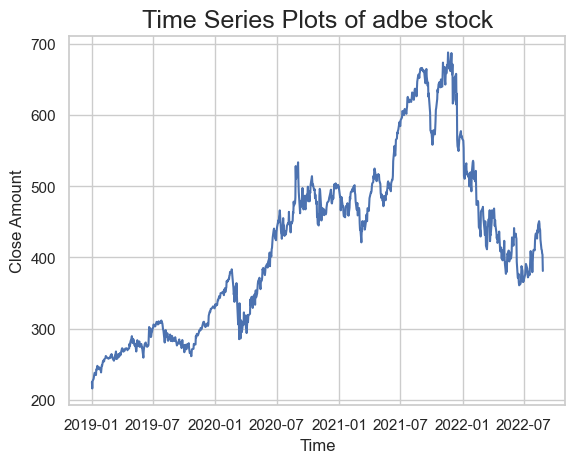

In [20]:
fig, ax = plt.subplots()
ax.plot(train_adbe_df.index, train_adbe_df['close'])
ax.set_ylabel('Close Amount')
ax.set_xlabel('Time')
ax.set_title('Time Series Plots of adbe stock', size=18)

Text(0.5, 0, 'Y')

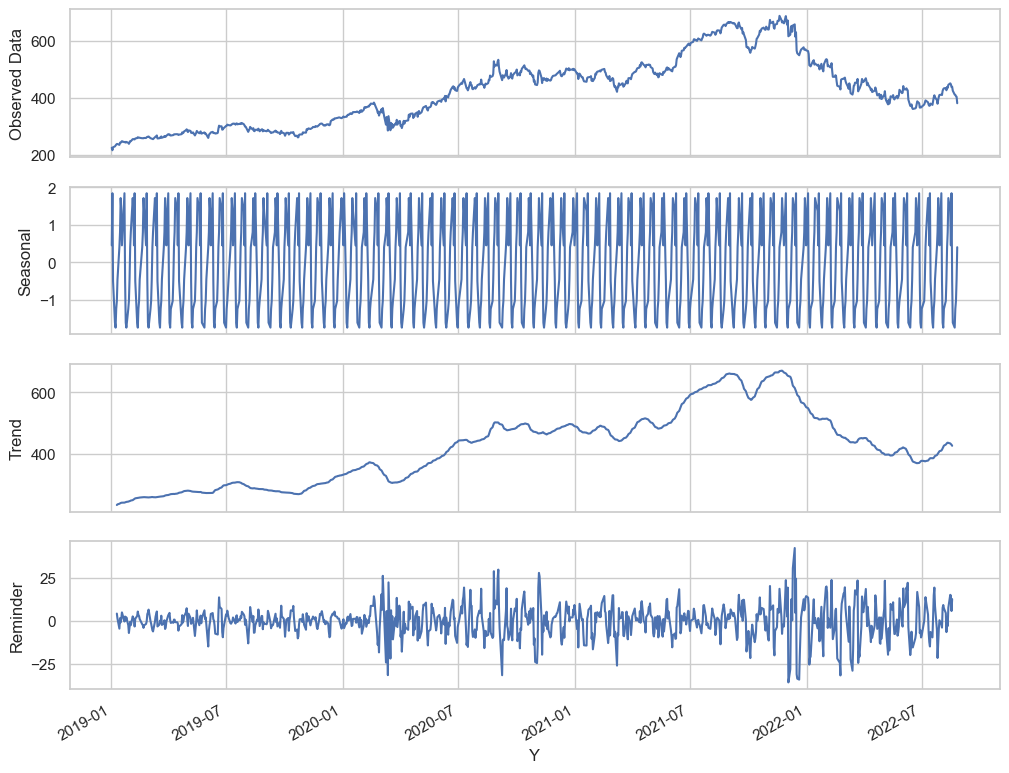

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(train_adbe_df['close'], model='additive', period=12)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('Observed Data')
res.seasonal.plot(ax=ax2)
ax2.set_ylabel('Seasonal')
res.trend.plot(ax=ax3)
ax3.set_ylabel('Trend')
res.resid.plot(ax=ax4)
ax4.set_ylabel('Reminder')

plt.xlabel("Y")

### Determine Error, Trend and Seasonality

An ETS model has three main components: error, trend, and seasonality. Each can be applied either additively, multiplicatively, or not at all. We will use the above Times Series Decomposition Plot to determine the additive or multiplicative property of the three components.

1. Trend - If the trend plot is linear then we apply it additively (A). If the trend line grows or shrinks exponentially, we apply it multiplicatively (M). If there is no clear trend, no trend component is included (N).

2. Seasonal - If the peaks and valleys for seasonality are constant over time, we apply it additively (A). If the size of the seasonal fluctuations tends to increase or decrease with the level of time series, we apply it multiplicatively (M). If there is no seasonality, it is not applied (N).

3. Error - If the error plot has constant variance over time (peaks and valleys are about the same size), we apply it additively (A). If the error plot is fluctuating between large and small errors over time, we apply it multiplicatively (M).

In [22]:
# Import the relevant libraries 
from statsmodels.tsa.exponential_smoothing.ets import ETSModel 
train_adbe_df = pd.Series(train_adbe_df['close']).astype('float64')
ets_model = ETSModel(train_adbe_df, error='mul', trend='mul', seasonal = 'add', 
                     damped_trend=True, seasonal_periods=12, initial_level=train_adbe_df.values.mean())
ets_fitted = ets_model.fit()
print(ets_fitted.summary())

C:\Users\FPT-ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 ETS Results                                  
Dep. Variable:                  close   No. Observations:                  921
Model:                      ETS(MMdA)   Log Likelihood               -3342.531
Date:                Wed, 12 Jun 2024   AIC                           6723.062
Time:                        22:17:56   BIC                           6814.745
Sample:                             0   HQIC                          6758.047
                                - 921   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7978      0.033     24.153      0.000       0.733       0.862
smoothing_trend         0.0003      0.011      0.027      0.978      -0.022       0.022
smoothing_season

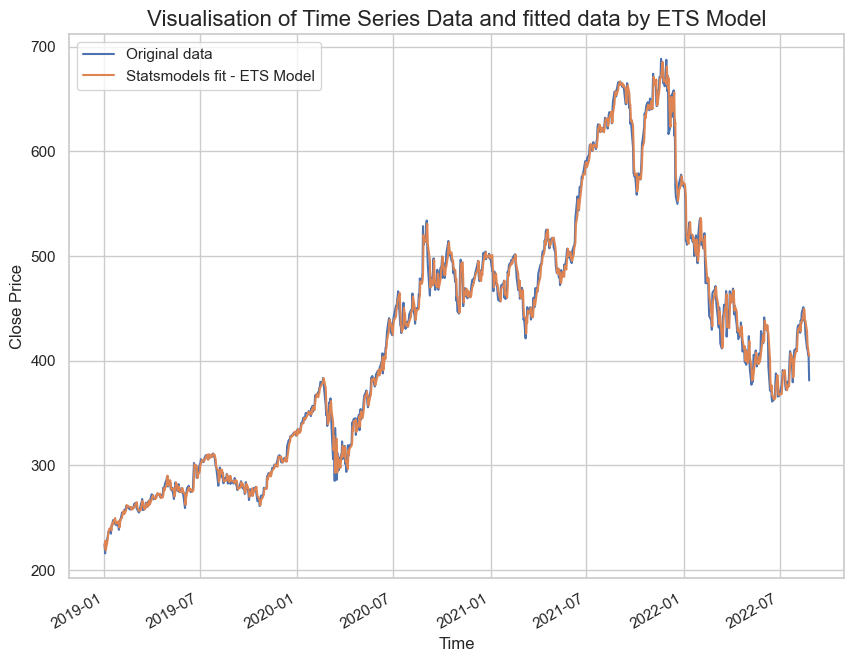

In [23]:
plt.figure(figsize=(10,8))
train_adbe_df.plot(label='Original data')
ets_fitted.fittedvalues.plot(label='Statsmodels fit - ETS Model')
plt.title('Visualisation of Time Series Data and fitted data by ETS Model' , fontsize=16)
plt.ylabel("Close Price");
plt.xlabel("Time")
plt.legend();